### Clasificación de dígitos MNIST

Importo las librerías necesarias

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Tratamiento de los datos

In [2]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los píxeles (rango 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

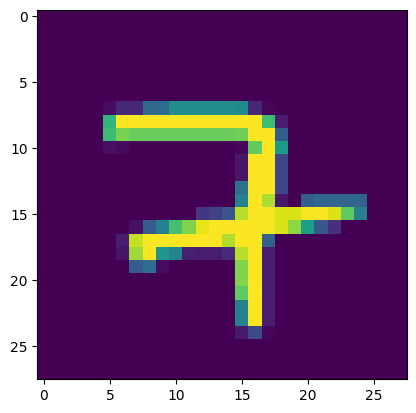

In [3]:
plt.imshow(x_train[38], interpolation='nearest')
plt.show()

Cambiamos la forma de los datos: matrices a vectores

In [5]:
x_train_vector = x_train.reshape(60000, 28*28)

Entrenamos el modelo

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_vector, y_train)

LinearDiscriminantAnalysis()

In [34]:
x_test_vector = x_test.reshape(10000, 28*28)

Hacemos predicción sobre el conjunto de prueba y calculamos la métrica de accuracy

In [36]:
y_pred = lda.predict(x_test_vector)
print(accuracy_score(y_pred, y_test))

0.873


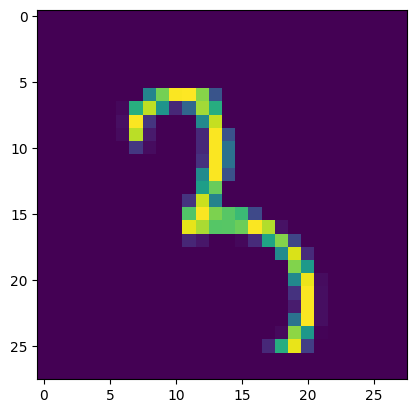

In [70]:
plt.imshow(x_test[195], interpolation='nearest')
plt.show()

Intentamos reducir la dimensión con PCA

In [6]:
pca = PCA().fit(x_train_vector)

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

Checamos cuantas componentes necesitamos para tener el 95% de la varianza explicada.

In [79]:
vector_suma = np.cumsum(pca.explained_variance_ratio_)
for i in range(784):
    if(vector_suma[i] >= 0.95):
        print(i)
        break

153


Ajustamos el algoritmo de PCA para que transforme nuestros datos a vectores de dimensión 153

In [81]:
pca_153 = PCA(n_components = 153).fit(x_train_vector)

In [82]:
x_train_vector_reduced = pca_153.transform(x_train_vector)

In [84]:
x_train_vector_reduced.shape

(60000, 153)

Entrenamos ahora el modelo con los datos de baja dimensión

In [85]:
lda_reduced = LinearDiscriminantAnalysis()
lda_reduced.fit(x_train_vector_reduced, y_train)

LinearDiscriminantAnalysis()

Hacemos la prueba sobre el modelo hecho con los datos de baja dimensión

In [86]:
x_test_vector_reduced = pca_153.transform(x_test_vector)

In [87]:
y_pred_reduced = lda_reduced.predict(x_test_vector_reduced)
print(accuracy_score(y_pred_reduced, y_test))

0.8752
